# 1. Introducción (Abstracto)

El presente trabajo indagará una base de clientes de un banco para poder determinar qué variables podrían estar influyendo a la hora de explicar el abandono o fuga de clientes del mismo.

Primeramente, se presentará el dataset elegido para trabajar, luego se señalará el contexto comercial y se determinará la pregunta problema y los objetivos que guían el trabajo. Posteriormente se procederá a analizar la información y a desarrollar un modelo de aprendizaje automático que permita responder la pregunta planteada.

Finalmente, se ofrecerán algunas conclusiones preliminares y posibles vías de acción en función de los resultados obtenidos.

# 2. Sobre el dataset elegido

**Sobre el dataset**

El dataset elegido para el presente trabajo es el de "Bank Customer Churn", publicado por Radheshyam Kollipara el 26/04/2024 en la plataforma Kaggle.

El mismo es un csv que contiene 10.000 filas y 18 columnas que contiene información sobre la rotación de clientes de un banco.

A continuación, se presenta un diccionario de las variables que contiene, el cual se encontraba en la descripción de la publicación del set de datos y es de gran ayudará para comprender la información que contiene el mismo.

- **RowNumber** (Número de fila): corresponde al número de registro (fila) y no afecta el resultado.
- **CustomerId** (Id. de cliente): contiene valores aleatorios y no afecta la salida del cliente del banco.
- **Surname** (Apellido): el apellido de un cliente no influye en su decisión de dejar el banco.
- **CreditScore** (Puntuación crediticia): puede afectar la pérdida de clientes, ya que un cliente con una puntuación crediticia más alta tiene menos probabilidades de dejar el banco.
- **Geography** (Geografía): la ubicación de un cliente puede afectar su decisión de dejar el banco.
- **Gender** (Género): es interesante explorar si el género influye en la pérdida de un cliente del banco.
- **Age** (Edad): esto es relevante, ya que los clientes de mayor edad tienen menos probabilidades de dejar el banco que los más jóvenes.
- **Staying** (Antigüedad): se refiere a la cantidad de años que el cliente lleva siendo cliente del banco. Normalmente, los clientes de mayor edad son más fieles y tienen menos probabilidades de dejar el banco.
- **Balance** (Saldo): también es un buen indicador de la pérdida de clientes, ya que las personas con un saldo mayor en sus cuentas tienen menos probabilidades de dejar el banco que aquellas con saldos menores.
- **NumOfProducts**: se refiere a la cantidad de productos que un cliente ha comprado a través del banco.
- **HasCrCard**: indica si un cliente tiene o no tarjeta de crédito. Esta columna también es relevante, ya que las personas con tarjeta de crédito tienen menos probabilidades de abandonar el banco.
- **IsActiveMember**: los clientes activos tienen menos probabilidades de abandonar el banco.
estimatesalary: al igual que con balance, las personas con salarios más bajos tienen más probabilidades de abandonar el banco en comparación con las personas con salarios más altos.
- **Exited**: si el cliente abandonó o no el banco.
- **Complaint**: el cliente tiene o no una queja.
- **Satisfaction Score**: puntaje proporcionado por el cliente para la resolución de su queja.
- **Card Type**: tipo de tarjeta que posee el cliente.
- **Points Earned**: los puntos ganados por el cliente por usar tarjeta de crédito.

Fuente: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

# 3. Contexto comercial

Generalmente, las estrategias comerciales de las entidades bancarias buscan retener a sus clientes la mayor cantidad de tiempo posible, dado que es más costoso dar de alta a un nuevo cliente que mantener uno existente.

En ese sentido, los posibles motivos que llevan a un cliente a abandonar la empresa constituyen un insumo de gran importancia a la hora de tomar decisiones y establecer estrategias comerciales tendientes a fidelizar clientes y motorizar campañas de retención para evitar la fuga de los mismos.

# 4. Pregunta problema y objetivos

La pregunta problema que guía este trabajo, entonces, es la de **¿qué factores influyen para que un cliente decida abandonar el banco?**

Para poder abordar la respuesta a esta pregunta, se llevará a cabo un análisis descriptivo de la información disponible en el dataset y posteriormente se procederá a constuir un modelo de aprendizaje automático capaz de predecir si un clientes abandonará el banco en función de la información disponible.

De esta forma, los **objetivos** que se desprenden de esta pregunta problema son:
- Indagar la información disponible y transformar los datos para su correcto análisis.
- Analizar y graficar relaciones entre las variables que permitan dar cuenta de la relación que tienen con el abandono de la empresa.
- Proponer e implementar un modelo de aprendizaje automático que permita identificar las principales variables que inciden en la fuga de clientes y predecir el abandono.

# 5. Hipótesis

**-   Hipótesis nula (H₀):** Las variables independientes (como edad, género, país, etc.) no tienen efecto estadísticamente significativo sobre la probabilidad de que un cliente se fugue. O al menos no lo tienen con una fuerza mayor al del azar (50%).

**-   Hipótesis alternativa (H₁):** Al menos una de las variables independientes tiene un efecto estadísticamente significativo sobre la probabilidad de fuga de un cliente.

# 6. Qué muestran los datos (EDA)

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Setear el path
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Curso - Ciencia de Datos con Python/TP Final")

Mounted at /content/gdrive


In [ ]:
# Importar el csv que utilizaremos
df = pd.read_csv('Customer-Churn-Records.csv')

Procedemos a explorar el set de datos para ver qué información trae y si es necesario realizar transformaciones que permitan su procesamiento posterior

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


Vemos que el set de datos no presenta valores nulos, por lo que procedemos con el análisis. La presencia de valores nulos sería problemática para nuestro modelo de aprendizaje automático ya que podría introducir sesgo o reducir el potencial explicativo del mismo.

Para facilitar su interpretación, procedemos a traducir los nombres de las variables.

In [ ]:
# Traducimos los nombres de las variables para facilitar su interpretación
traduccion_dict = {
    'RowNumber': 'NumeroFila',
    'CustomerId': 'IdCliente',
    'Surname': 'Apellido',
    'CreditScore': 'ScoreCrediticio',
    'Geography': 'PaisOrigen',
    'Gender': 'Genero',
    'Age': 'Edad',
    'Tenure': 'Antiguedad',
    'Balance': 'SaldoDisponible',
    'NumOfProducts': 'NumProductos',
    'HasCrCard': 'TieneTarjetaCredito',
    'IsActiveMember': 'EsMiembroActivo',
    'EstimatedSalary': 'SalarioEstimado',
    'Exited': 'Fugado',
    'Complain': 'Queja',
    'Satisfaction Score': 'ScoreSatisfaccion',
    'Card Type': 'TipoTarjeta',
    'Point Earned': 'PuntosAcumulados'
}

df2 = df.rename(columns=traduccion_dict)

In [ ]:
df2.sample(3)

,NumeroFila,IdCliente,Apellido,ScoreCrediticio,PaisOrigen,Genero,Edad,Antiguedad,SaldoDisponible,NumProductos,TieneTarjetaCredito,EsMiembroActivo,SalarioEstimado,Fugado,Queja,ScoreSatisfaccion,TipoTarjeta,PuntosAcumulados
9261,9262,15677117,Crawford,629,France,Female,61,6,0.00,2,1,1,133672.61,0,0,5,GOLD,803
1436,1437,15646615,Muir,576,Germany,Male,28,1,119336.29,2,0,1,58976.85,0,0,1,GOLD,592
1953,1954,15675190,Chia,623,France,Male,21,10,0.00,2,0,1,135851.30,0,0,2,PLATINUM,285


Procedemos a indagar sobre la distribución de los valores hacia el interior del dataset.

In [ ]:
df2.describe()

,NumeroFila,IdCliente,ScoreCrediticio,Edad,Antiguedad,SaldoDisponible,NumProductos,TieneTarjetaCredito,EsMiembroActivo,SalarioEstimado,Fugado,Queja,ScoreSatisfaccion,PuntosAcumulados
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Analizamos lo que ocurre con nuestra variable target.

In [ ]:
print(df2['Fugado'].unique())


[1 0]


In [ ]:
print(df2['Fugado'].value_counts())

Fugado
0    7962
1    2038
Name: count, dtype: int64


Vemos que la variable de interés en nuestro análisis (dependiente) es binaria, es decir, tiene campos 0 y 1, donde 1 indica que ese cliente se fugó.

También es posible registrar que el 20,38% de los casos se fugaron mientras que el 79,62% no lo hicieron. Esta situación muestra una situación de desbalanceo de las variables analizadas, donde la población que efectivamente se fugó de la empresa se encuentra subrepresentada en relación a quienes no lo hicieron.

Esta situación deberá tenerse en cuenta a la hora de avanzar con nuestro modelo, dado que sino se mostrarán estimaciones erróneas que no representativas de nuestros datos.

Antes de proceder a graficar, analizamos la distribución de las variables nominales que pueden jugar un papel importante en el análisis de fuga de clientes del banco.

In [ ]:
# Distribución porcentual de Género
df2['Genero'].value_counts(normalize=True) * 100


,proportion
Genero,
Male,54.57
Female,45.43


In [ ]:
# Distribución porcentual de País
df2['PaisOrigen'].value_counts(normalize=True) * 100

,proportion
PaisOrigen,
France,50.14
Germany,25.09
Spain,24.77


In [ ]:
# Distribución porcentual de País
df2['TipoTarjeta'].value_counts(normalize=True) * 100

,proportion
TipoTarjeta,
DIAMOND,25.07
GOLD,25.02
SILVER,24.96
PLATINUM,24.95


Buscamos inconsistencias o errores vinculados con la recolección de información

In [ ]:
# Variables donde 0 podría ser un problema
variables_a_chequear = ['NumeroFila', 'IdCliente', 'ScoreCrediticio', 'Edad', 'Antiguedad', 'SaldoDisponible', 'NumProductos', 'TieneTarjetaCredito', 'EsMiembroActivo', 'SalarioEstimado', 'Fugado', 'Queja', 'ScoreSatisfaccion', 'PuntosAcumulados']

for col in variables_a_chequear:
    print(f"{col}: {sum(df2[col] == 0)} registros con valor 0")

NumeroFila: 0 registros con valor 0
IdCliente: 0 registros con valor 0
ScoreCrediticio: 0 registros con valor 0
Edad: 0 registros con valor 0
Antiguedad: 413 registros con valor 0
SaldoDisponible: 3617 registros con valor 0
NumProductos: 0 registros con valor 0
TieneTarjetaCredito: 2945 registros con valor 0
EsMiembroActivo: 4849 registros con valor 0
SalarioEstimado: 0 registros con valor 0
Fugado: 7962 registros con valor 0
Queja: 7956 registros con valor 0
ScoreSatisfaccion: 0 registros con valor 0
PuntosAcumulados: 0 registros con valor 0


In [ ]:
categoricas = ['Genero', 'PaisOrigen', 'TipoTarjeta']

for col in categoricas:
    print(f"Valores únicos en {col}:")
    print(df2[col].unique())
    print()

Valores únicos en Genero:
['Female' 'Male']

Valores únicos en PaisOrigen:
['France' 'Spain' 'Germany']

Valores únicos en TipoTarjeta:
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']



Procedemos a realizar el primer gráfico, un boxplot, para poder ver más en detalle la distribución de cada variable y poder detectar valores atípicos.

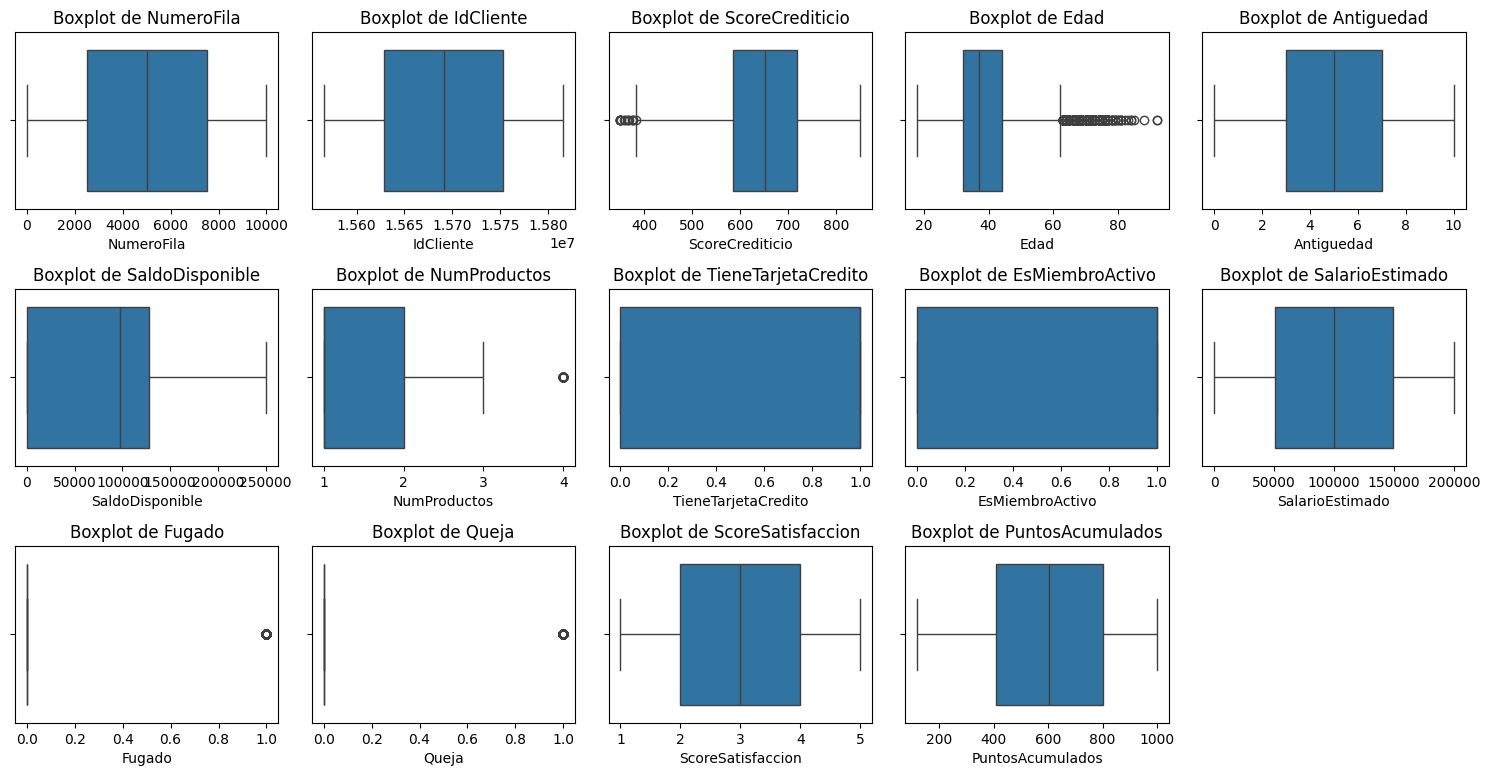

In [ ]:
# Seleccionar solo las columnas numéricas
numerical_cols = df2.select_dtypes(include=[float, int]).columns

# Graficar
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i+1)
    sns.boxplot(data=df2, x=col)
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

Vemos que las variables ScoreCrediticio, Edad y NumProductos presentan outliers, algo que tenemos que tener en cuenta cuando profundicemos el análisis.

Ahora procedemos a analizar cada variable numérica en relación a la variable target (fuga). Para ello, volveremos a graficar los boxplot de las variables continuas pero incorporando el cruce con la variable target en cada caso.


Variables numéricas continuas vs Target:


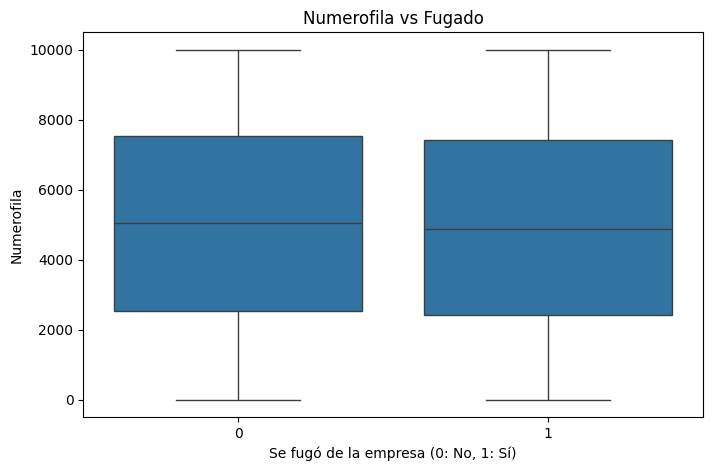

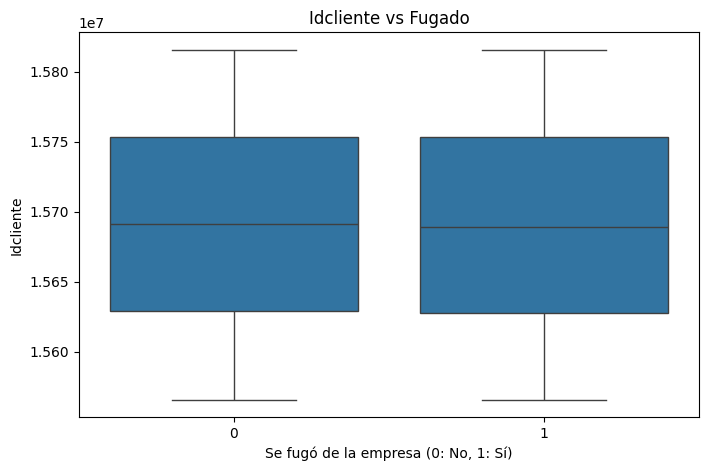

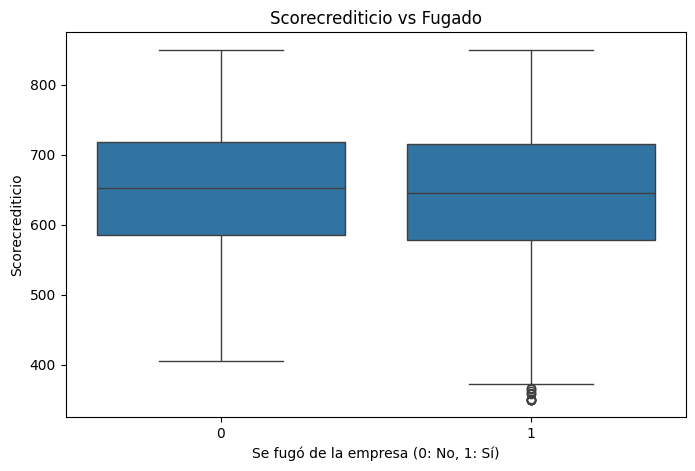

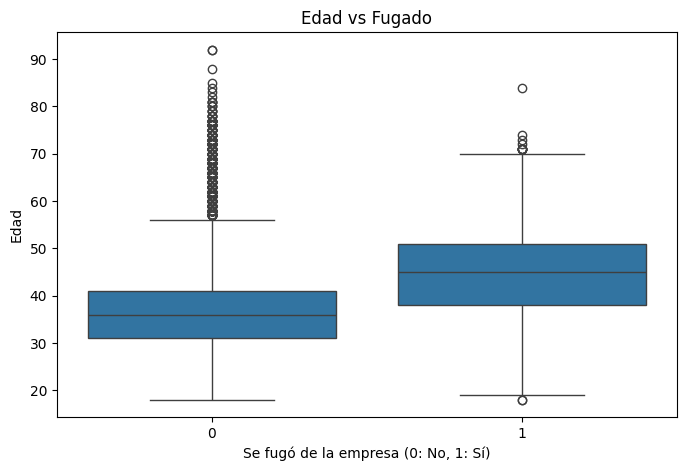

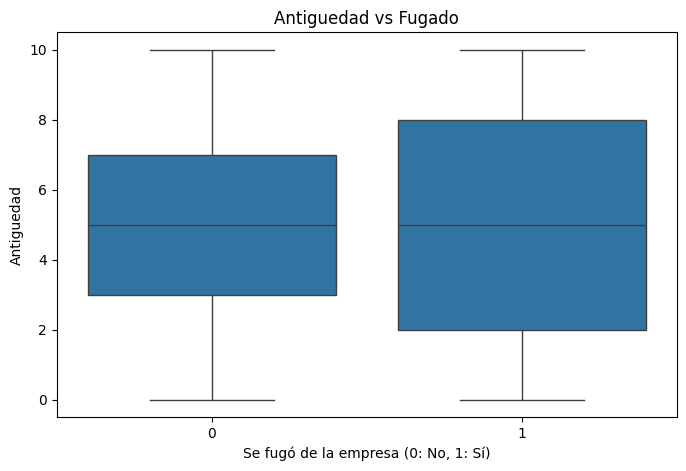

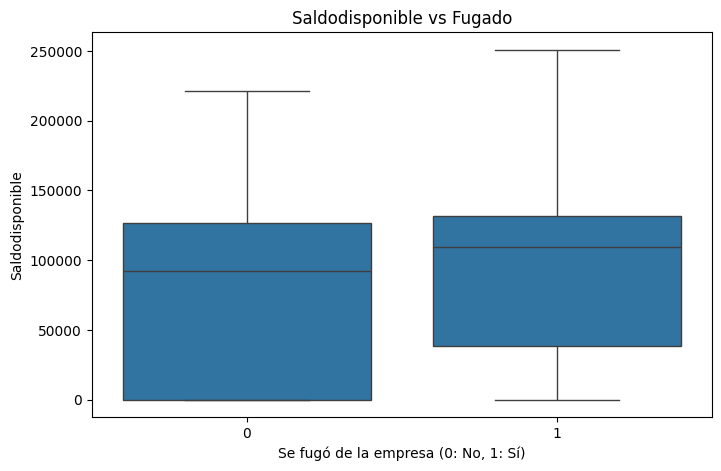

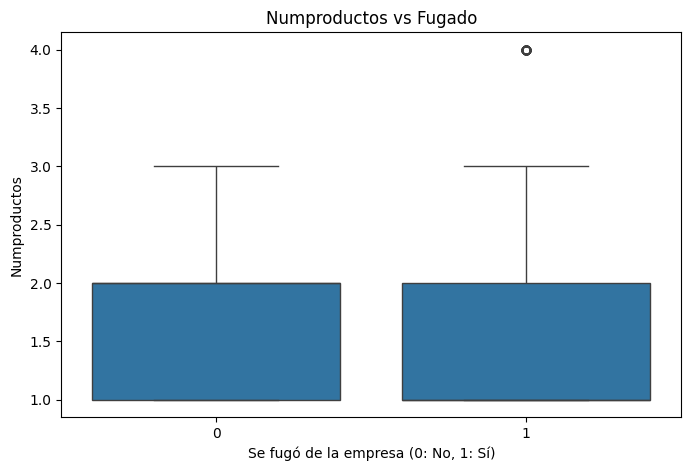

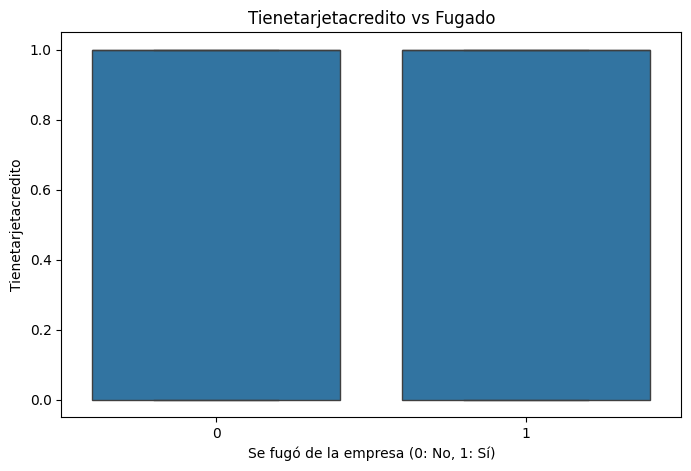

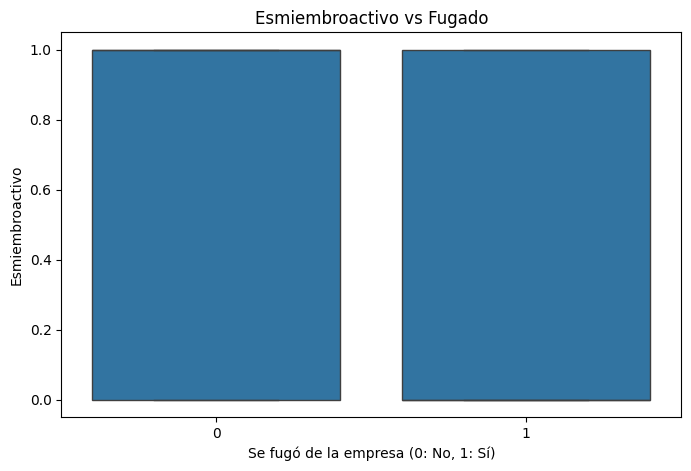

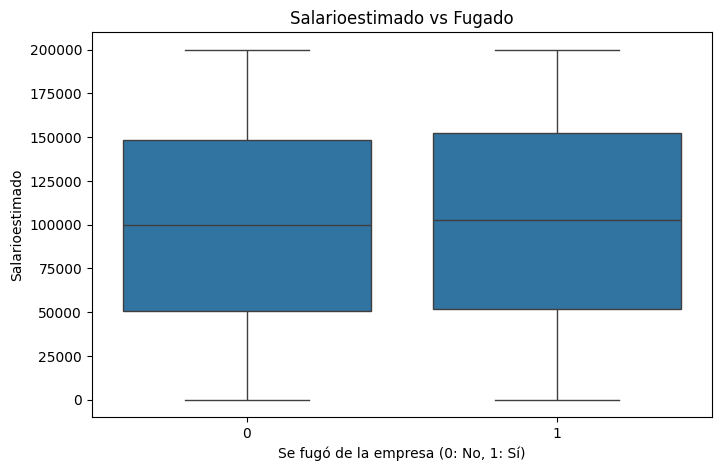

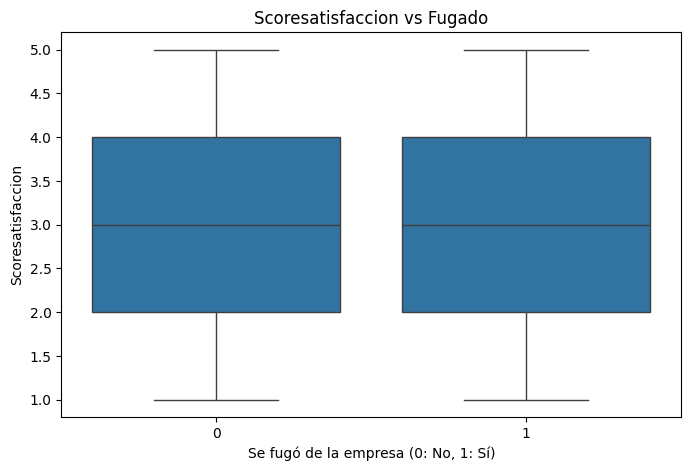

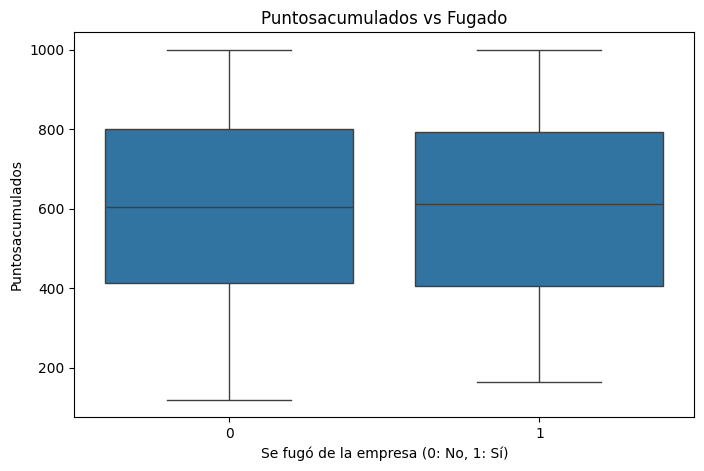

In [ ]:
# Sacamos Fugado y Queja del df ya que no tiene sentido incluirlos debido a que son variables binarias
numerical_cols2 = [col for col in numerical_cols if col not in ['Fugado', 'Queja']]

# Boxplots para variables continuas vs target
print("\nVariables numéricas continuas vs Target:")
for col in numerical_cols2:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Fugado', y=col, data=df2)
    plt.title(f'{col.capitalize()} vs Fugado')
    plt.xlabel('Se fugó de la empresa (0: No, 1: Sí)')
    plt.ylabel(col.capitalize())
    plt.show()

Las únicas variables que llaman la atención son:
- Scorecrediticio: más bajo en el caso de los fugados, además de contar con outliers por debajo del primer cuartil para los mismos casos
- Edad: más elevada en el caso de los fugados, pero con muchos outliers(de edad elevada) en los que no se fugaron
- Antigüedad: cuenta con un rango más amplio de años en el caso de los fugados
- Saldodisponible: en el caso de los fugados, cuentan con valores más elevados que los no fugados


Procedemos a analizar qué variables correlacionan con la variable Fugado, para luego poder hacer un doble click en ese vínculo.

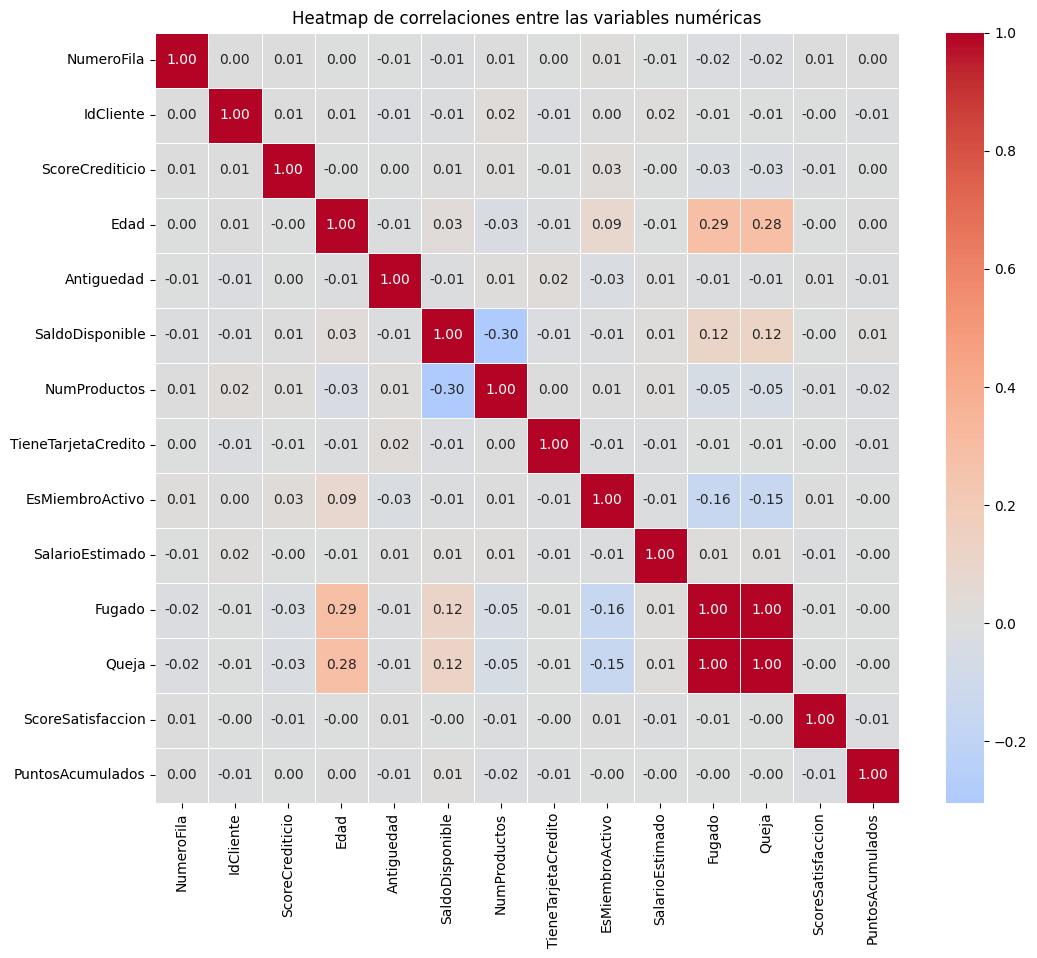

In [ ]:
# Calcula la matriz de correlaciones
matriz_correlacion = df2.corr(numeric_only=True)

# Heatmap de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, center=0)
plt.title('Heatmap de correlaciones entre las variables numéricas')
plt.show()


El mapa de calor con la matriz de correlaciones nos muestra que la variable edad tiene una correlación positiva de 0.29 con Fugado, lo que indica que a mayor edad, mayor probabilidad de que un cliente se fugue.

También destaca EsMiembroActivo que tiene una correlación negativa de -0.16 con Fugado, lo que implica que los clientes activos tienen menor probabilidad de fugarse.

Por otro lado, Queja tiene una correlación positiva de 1 con Fugado, sugiriendo que las probabilidades de fuga de un cliente que se quejó son prácticamente del 100%. Esto es extraño, podría indicar que hay un error en el dataset.


In [ ]:
diferencias = df2[df2['Fugado'] != df2['Queja']]
print(len(diferencias))

14


In [ ]:
igualdades = df2[df2['Fugado'] == df2['Queja']]
print(len(igualdades))

9986


Sin embargo, vemos que hay 14 registros que no son idénticos.

A primera vista, la única variable que parecería correlacionar más claramente con la fuga es Edad. Veamos esta situación con más detalle.

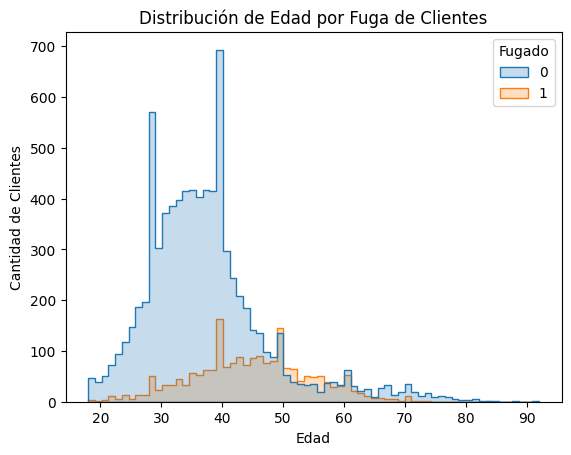

In [ ]:
# Crear el histograma
sns.histplot(data=df2, x='Edad', hue='Fugado', element='step')  # element='step' para evitar barras superpuestas

plt.title('Distribución de Edad por Fuga de Clientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')

plt.show()

Al graficar en un histograma la relación entre la Edad y la Fuga, vemos que el abandono del banco tiende a concentrarse en edades más elevadas, lo cual se condice a su vez con el descenso de clientes en esos rangos etarios.

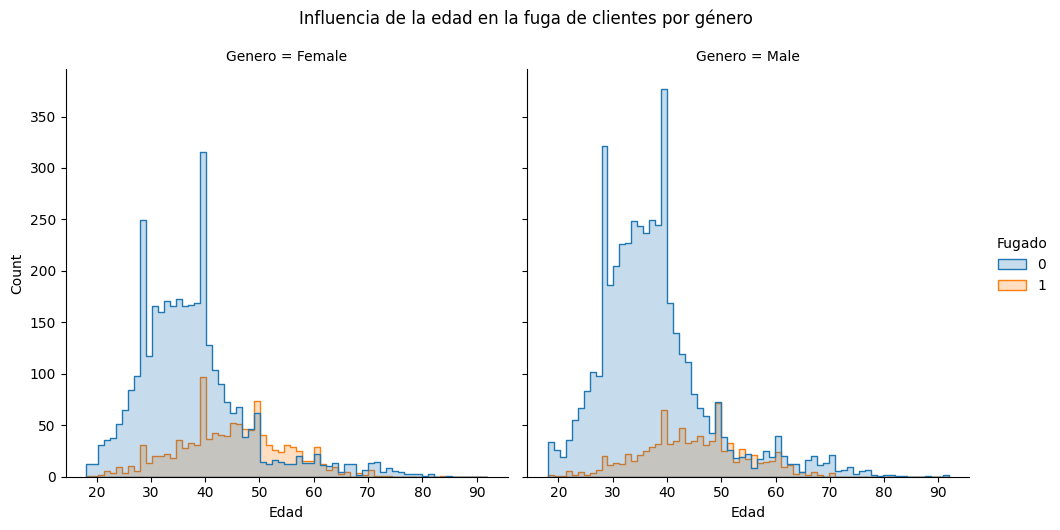

In [ ]:
sns.displot(data=df2, x='Edad', hue='Fugado', element='step', col='Genero')

plt.suptitle('Influencia de la edad en la fuga de clientes por género', y=1.05)
plt.show()

Al introducir la varible género, vemos que las mujeres tienen una mayor fuga que los varones y al verlo por edad, podemos visualizar que es más elevada en mujeres en edades más elevadas.

In [ ]:
fugados_df = df2[df2['Fugado'] == 1]

porcentaje_fugados_genero = fugados_df.groupby('Genero')['Fugado'].count() / len(fugados_df) * 100

print(porcentaje_fugados_genero)

Genero
Female    55.888126
Male      44.111874
Name: Fugado, dtype: float64


Como podemos ver, las mujeres explican el 55% de la fuga, mientras que los hombre solo el 44%. Si volvemos a ver la información de las distribución por género, casi el 55% de los clientes eran hombres. Es decir, hay más clientes hombres y las que más se fugan son mujeres.

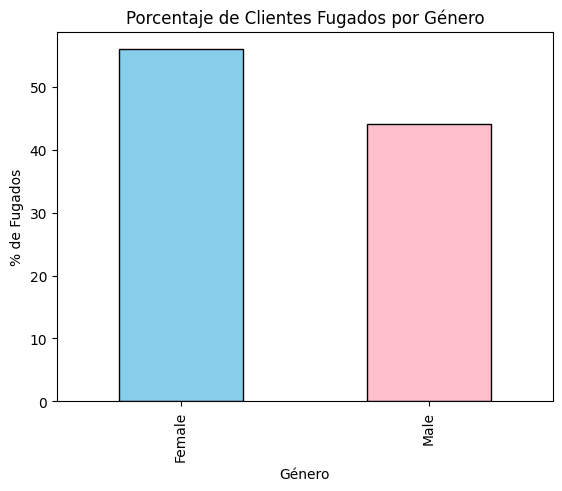

In [ ]:
porcentaje_fugados_genero.plot(kind='bar', color=['skyblue', 'pink'], edgecolor='black')
plt.title('Porcentaje de Clientes Fugados por Género')
plt.ylabel('% de Fugados')
plt.xlabel('Género')
plt.show()

Indagaremos sobre otra variable nominal que puede llegar a tener influencia en la fuga de clientes: PaisOrigen.

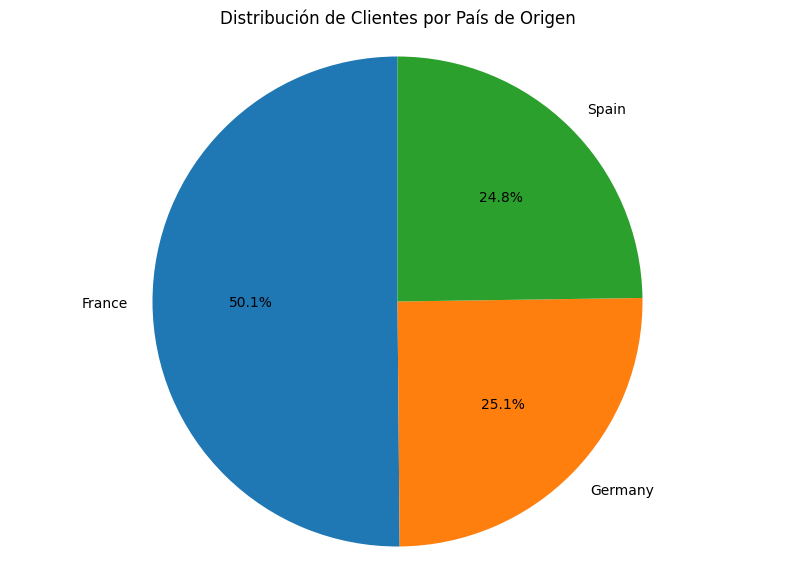

In [ ]:
pais_origen_counts = df2['PaisOrigen'].value_counts()

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(pais_origen_counts, labels=pais_origen_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Distribución de Clientes por País de Origen')
plt.show()

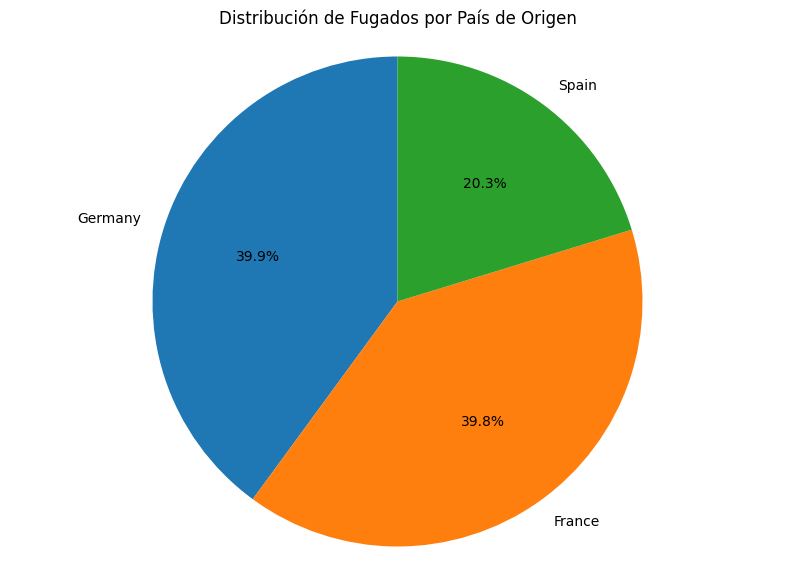

In [ ]:
fugados_df = df2[df2['Fugado'] == 1]
pais_origen_counts2 = fugados_df['PaisOrigen'].value_counts()

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(pais_origen_counts2, labels=pais_origen_counts2.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Distribución de Fugados por País de Origen')
plt.show()

A través de los gráficos de torta, podemos ver que la proporción de clientes que se fugan aumenta considerablemente en los clientes que son de Alemania, mientras que desciende en los de Francia.

Finalmente, vemos por tipo de tarjeta si se presentan diferencias significativas.

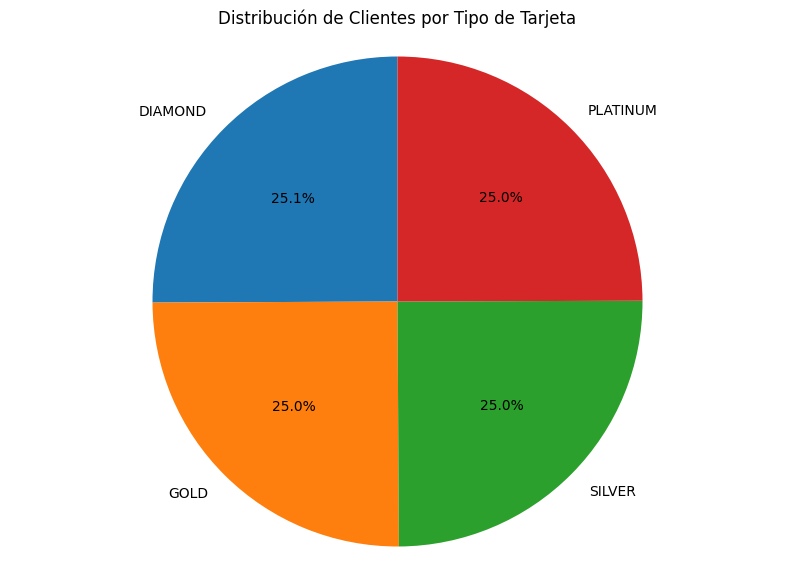

In [ ]:
tipo_tarjeta = df2['TipoTarjeta'].value_counts()

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(tipo_tarjeta, labels=tipo_tarjeta.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Distribución de Clientes por Tipo de Tarjeta')
plt.show()

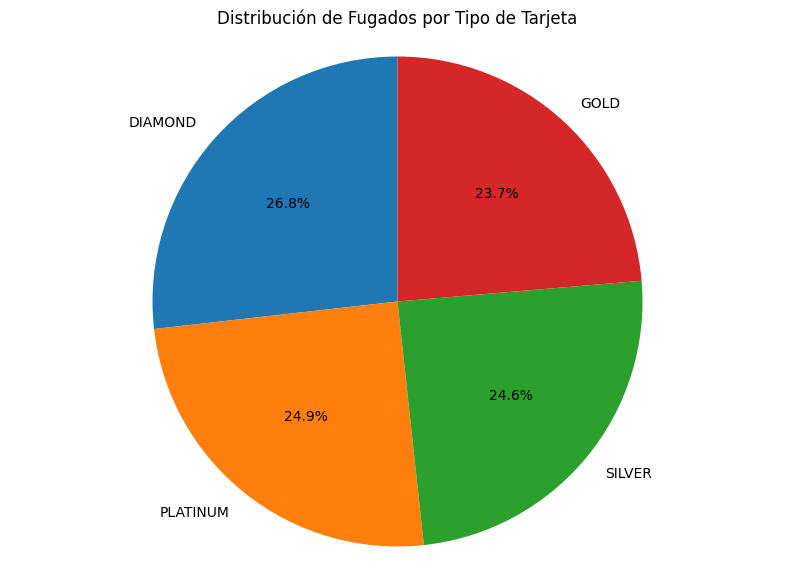

In [ ]:
fugados_df = df2[df2['Fugado'] == 1]
tipo_tarjeta2 = fugados_df['TipoTarjeta'].value_counts()

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(tipo_tarjeta2, labels=tipo_tarjeta2.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Distribución de Fugados por Tipo de Tarjeta')
plt.show()

La variación es mínima.

# 7. Qué modelo elegir en función del EDA

En principio no parecería haber relaciones claras entre variables y fuga de clientes. La única que parecería tener una correlación elevada es Edad.

Dado que nuestra variable target es binaria y lo que buscamos es conocer la probabilidad de que un cliente se fugue en función de las variables que tenemos a disposición, se elegirá trabajar con un **modelo de clasificación**, puntualmente Random Forest (árboles de decisión).

Este modelo permite obtener una medida de la importancia de cada variable del dataset elegido, exactamente el ejercicio que queremos practicar. Además, es un modelo que trabaja correctamente con datos desbalanceados, como es nuestro caso, y es poco sensible a los outliers, que también vimos que se encuentran presente en varias variables potencialmente de interés.

# 8. Feature Engineering

Para poder avanzar con la creación y el test de nuestro modelo, una posibilidad era la de recategorizar la variable Edad en grupos de edad, a modo de simplificar su interpretación y también para reducir el número outliers ya que, como pudo analizarse anteriormente, se registra un gran número de outliers especialmente en edades avanzadas.

Sin embargo, dado que el modelo elegido trabaja eficientemente con outliers, se decidió no proceder con la recategorización.

Lo que sí se procederá a crear son variables dummies para las variables categóricas Género y Pais de Origen (One-Hot Encoding) para evitar interpretaciones erróneas entre las categorías.

# 9. Elaboración del modelo

Eliminamos Fugado porque es nuetra variable target, y NumeroFila, IdCLiente y Apellido porque no tiene sentido su incorporación. En el caso de Queja, se eliminó porque tiene una correlación casi perfecta con la variable objetivo Fugado y a la hora de correr el modelo, contribuía a generar un sesgo optimista demasiado elevado.

In [ ]:
X = df2.drop(columns=['Fugado', 'NumeroFila', 'IdCliente', 'Apellido', 'Queja'])
y = df2['Fugado']

In [ ]:
# Por las dudas, no reciclamos las columnas categóricas creadas anteriormente
categoricas2 = X.select_dtypes(include='object').columns.tolist()

No se normalizaron variables ya que Random Forest no es sensible a las distintas escalas de las variables, dado que se basa en árboles de decisión que segmentan los datos según umbrales y no según distancias.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas2)
    ],
    remainder='passthrough'  # las columnas numéricas se dejan como están
)

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['PaisOrigen', 'Genero', 'TipoTarjeta'])])

Dividimos los casos en entrenamiento y prueba

In [ ]:
# Usamos stratify=y para mantener la proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Armamos el pipeline

In [ ]:
modelo = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

# n_estimators: número de árboles en el bosque. 100 es un buen punto de partida.
# random_state: para reproducibilidad.
# class_weight='balanced': útil si las clases están desbalanceadas, ajusta pesos inversamente proporcional a la frecuencia.

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['PaisOrigen', 'Genero', 'TipoTarjeta'])])

Entrenamiento del modelo

In [ ]:
modelo.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PaisOrigen', 'Genero',
                                                   'TipoTarjeta'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

Procedemos a predecir en el conjunto de prueba

In [ ]:
y_pred = modelo.predict(X_test)
y_pred_proba = modelo.predict_proba(X_test)[:, 1]

# 10. Resultados

a) Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2%}")

Accuracy del modelo: 86.44%


b) Matriz de confusión

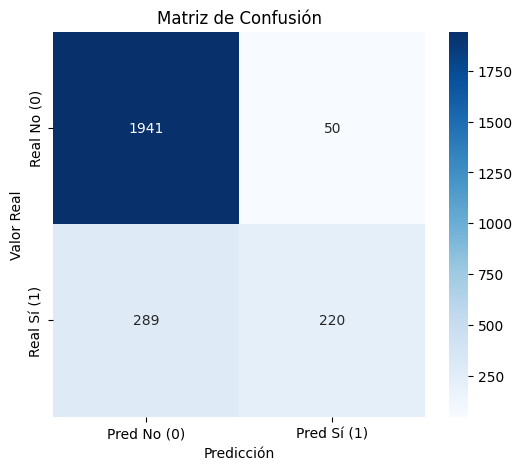

Verdaderos Negativos (TN): 1941
Falsos Positivos (FP): 50
Falsos Negativos (FN): 289
Verdaderos Positivos (TP): 220


In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred No (0)', 'Pred Sí (1)'], yticklabels=['Real No (0)', 'Real Sí (1)'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()
print(f"Verdaderos Negativos (TN): {cm[0,0]}")
print(f"Falsos Positivos (FP): {cm[0,1]}")
print(f"Falsos Negativos (FN): {cm[1,0]}")
print(f"Verdaderos Positivos (TP): {cm[1,1]}")

c) Reporte de clasificación

In [ ]:
target_names = ['No Fugado (0)', 'Sí Fugado (1)']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

No Fugado (0)       0.87      0.97      0.92      1991
Sí Fugado (1)       0.81      0.43      0.56       509

     accuracy                           0.86      2500
    macro avg       0.84      0.70      0.74      2500
 weighted avg       0.86      0.86      0.85      2500



d) Cursa ROC y AUC

In [ ]:
#Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

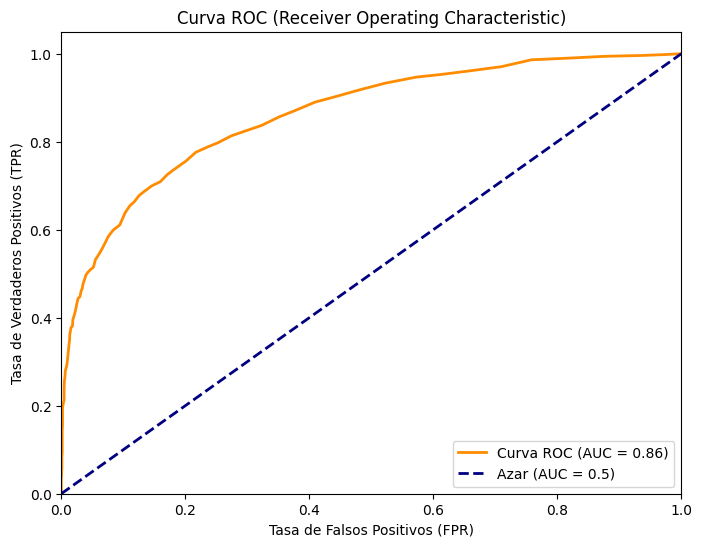

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(f"Área Bajo la Curva ROC (AUC): {roc_auc:.4f}")

Área Bajo la Curva ROC (AUC): 0.8614


e) Análisis de la importancia

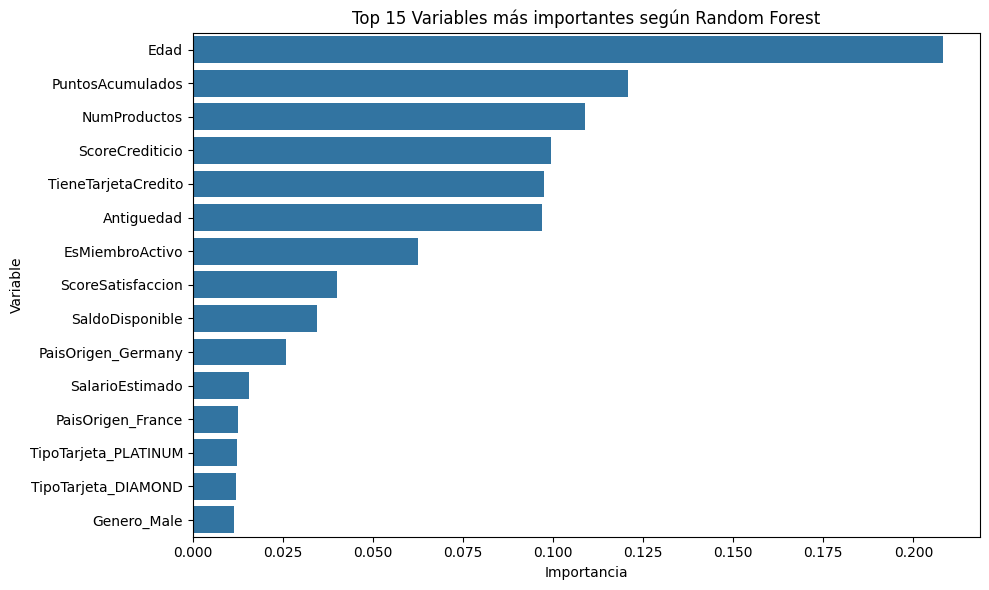

In [ ]:
rf_classifier = modelo.named_steps['classifier']
importances = rf_classifier.feature_importances_

ohe = modelo.named_steps['preprocessing'].transformers_[0][1]
ohe_features = ohe.get_feature_names_out(categoricas2)

num_features = X.columns.difference(categoricas).tolist()

final_features = np.concatenate([ohe_features, num_features])

importances_df = pd.DataFrame({
    'Variable': final_features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Graficamos
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df.head(15), x='Importancia', y='Variable')
plt.title('Top 15 Variables más importantes según Random Forest')
plt.tight_layout()
plt.show()

In [ ]:
print("Resumen de Resultados:")
print(f"- Accuracy del modelo en el conjunto de prueba: {accuracy:.4f}")
print(f"- AUC del modelo en el conjunto de prueba: {roc_auc:.4f}")
print("- El reporte de clasificación muestra buena Precisión, Recall y F1-Score para ambas clases (0 y 1).")

Resumen de Resultados:
- Accuracy del modelo en el conjunto de prueba: 0.8644
- AUC del modelo en el conjunto de prueba: 0.8614
- El reporte de clasificación muestra buena Precisión, Recall y F1-Score para ambas clases (0 y 1).


# 11. Conclusiones preliminares

La breve ejercitación del presente trabajo nos permitió dar cuenta de algunas variables que podrían estar influyendo en la fuga de los clientes, información de gran importancia para que el banco tome acciones comerciales tendientes a disminuir la salida de estos clientes.

**Apuntes del EDA**

El análisis inicial nos permitió divisar a la edad como la variable que mayor correlación guarda con la fuga de clientes. En ese sentido, la salida de clientes aumenta en los clientes mayores en relación a los de menor edad.

También aparecieron, con menor fuerza, las variables género donde el porcentaje de mujeres que abandona el banco es mayor que el de hombres y país de origen, donde la fuga es proporcionalmente mayor en los clientes que son de Alemania, como otra variable que podría explicar la fuga.

**Apuntes del Random Forest**

Nuestro modelo de clasificación arrojó resultados que deben analizarse con precaución.

Por un lado, los resultados indican que es posible predecir la fuga de clientes con un accuracy superior al 86% y un AUC al 0,5. Esto nos situaría en condiciones de poder rechazar la hipótesis nula de que no es posible realizar la predicción con alguna de las variables del modelo de una forma estadísticamente significativa.

También señalan en primer lugar a la variable edad como la más influyente de la predicción, en línea con lo visto en el análisis descriptivo, pero no presenta mayor claridad sobre el resto de las variables analizadas.

Por otro lado, el reporte de clasificación nos indica que el modelo tiene mejor recall y f1-score para detectar a los clientes que no se fugan en relación a los que sí lo hacen. En los fugados, el recall fue bajo y el modelo sólo detecta el 43% de los clientes que se fugan, mientras que en F1-score es del 56%, también bajo. Esta situación se ve con claridad en la matriz de confusión, donde se divisan los casos que el modelo no detecta como fugados.

Esto hace que los resultados no sean satisfactorios completamente y merezcan una revisión del modelo. Entre las posibles medidas de acción a tomar, se podría:
- Ajustar el umbral de clasificación, para que aumente el recall a cambio de tener menor accuracy.
- Implementar algún método de balanceo de datos previo a correr el modelo.
- Probar con otro modelo de clasificación, como puede ser una regresión logística.

Son caminos de acción que se podrían tomar en un análisis ulterior a fin de poder mejorar la predicción del modelo.